In [1]:
# import standard scientific computing tools
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import networkx as nx 

import re

# use mygene.info to translate between entrez and gene symbol
import mygene 
mg = mygene.MyGeneInfo()


# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

import plotly

import plotly.graph_objects as go

plotly.offline.init_notebook_mode(connected=True)
##px.init_notebook_mode(connected=True)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

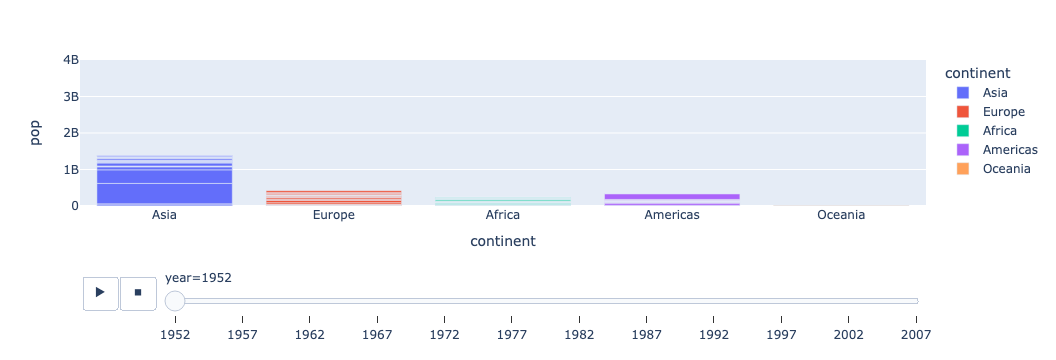

In [2]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

In [3]:
import plotly.graph_objects as go

xvals = np.linspace(1, 10, 100)
yvals = np.sin(x)

frames = []
for i in range(len(xvals)):
    frames.append(go.Frame(data=[go.Scatter(x=xvals[:i], y=yvals[:i])]))
    
# frames = [go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
#             go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
#             go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])])]

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 10], autorange=False),
        yaxis=dict(range=[-1, 1], autorange=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 50, 
                                                 "redraw": False},
                                                 "fromcurrent": True, 
                                                 "transition": {"duration": 0}}])])]

                                            
    ),
    frames=frames
)

fig.show()

NameError: name 'x' is not defined

In [4]:
import matplotlib.cm

# development versions of return_node_to_color and return_edge_to_color

def return_node_to_color(G,field_to_map='degree',cmap=matplotlib.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        color_max_frac = 1.0,color_min_frac = 0.0,vmin=None,vmax=None):
    

    '''
    Function to return a dictionary mapping nodes (keys) to colors (values), based on the selected field_to_map.
        - field_to_map must be a node attribute
        - cmap must be a valid matplotlib colormap
        - color_max_frac and color_min_frac allow user to set lower and upper ranges for colormap
    
    '''
    
    
    
    nodes_with_data = [(n[0],n[1][field_to_map]) for n in G.nodes(data=True)]
    
    
    if color_vals_transform == 'log':
        nodes,data = zip(*nodes_with_data)
        min_dn0 = np.nanmin([d for d in data if d>0])
        data = [np.log(np.max([d,min_dn0])) for d in data]  # set the zero d values to minimum non0 value
        data = [(d-np.nanmin(data)) for d in data] # shift so we don't have any negative values
        nodes_with_data = zip(nodes,data)
        
    elif color_vals_transform == 'sqrt':
        nodes,data = zip(*nodes_with_data)
        data = [np.sqrt(d) for d in data]
        nodes_with_data = zip(nodes,data)
        
    elif color_vals_transform == 'ceil':
        nodes,data = zip(*nodes_with_data)
        data = [min(d,ceil_val) for d in data]
        nodes_with_data = zip(nodes,data)
    else:
        nodes,data = zip(*nodes_with_data)
        
    # if vmin and vmax aren't set, set them to min and max of the data
    if vmin == None:
        vmin = np.nanmin(data)
    if vmax == None:
        vmax = np.nanmax(data)
	
    if vmin == vmax:
        vmax = vmax + 0.01
        
    node_to_mapField = dict(nodes_with_data)
    
    color_to_mult = 256*(color_max_frac-color_min_frac)
    color_to_add = 256*color_min_frac
    
    color_list = [np.multiply(cmap(int(float(node_to_mapField[d]-vmin)/(vmax-vmin)*color_to_mult+color_to_add)),256) 
                  if ~np.isnan(node_to_mapField[d])
                  else [np.nan]
                  for d in G.nodes()]
    
    color_list = [(int(c[0]),int(c[1]),int(c[2]),alpha) 
                  if ~np.isnan(c[0])
                  else (200,200,200,alpha)
                  for c in color_list]

    node_to_color = dict(zip(G.nodes(),['rgba'+str(c) for c in color_list]))
    
    return node_to_color

def return_edge_to_color(G,field_to_map='degree',cmap=matplotlib.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        vmin=None,vmax=None):
    
    
    '''
    Function to return a dictionary mapping edges (keys) to colors (values), based on the selected field_to_map.
        - field_to_map must be an edge attribute
        - cmap must be a valid matplotlib colormap
    
    '''
    
    # if this is a multigraph or multidigraph, we need to keep track of keys
    if (type(G) == nx.classes.multigraph.MultiGraph) | (type(G) == nx.classes.multidigraph.MultiDiGraph):
        
        edges_with_data = [(e[0], e[1] , e[2], e[3][field_to_map]) for e in G.edges(keys = True, data=True)]
        edges1, edges2, keys, data = zip(*edges_with_data)

        if color_vals_transform == 'log': # log(data)
            data = [np.log(d) for d in data]
            data = [(d-np.min(data)) for d in data] # shift so we don't have any negative values
        elif color_vals_transform == 'sqrt': # sqrt(data)
            data = [np.sqrt(d) for d in data]
        elif color_vals_transform == 'ceil': # ceil(data)
            data = [max(d,ceil_val) for d in data]
            
        edges_with_data = zip(zip(edges1, edges2, keys), data) # map edges to modified data
    
    # otherwise perform operations normally
    else:
        edges_with_data = [(e[0], e[1], e[2][field_to_map]) for e in G.edges(data=True)]
        edges1, edges2, data = zip(*edges_with_data)

        if color_vals_transform == 'log':
            data = [np.log(d) for d in data]
            data = [(d-np.min(data)) for d in data] # shift so we don't have any negative values
        elif color_vals_transform == 'sqrt':
            data = [np.sqrt(d) for d in data]
        elif color_vals_transform == 'ceil':
            data = [max(d,ceil_val) for d in data]
        
        edges_with_data = zip(zip(edges1,edges2),data)
        
    # if vmin and vmax aren't set, set them to min and max of the data
    if vmin == None:
        vmin = np.nanmin(data)
    if vmax == None:
        vmax = np.nanmax(data)
	
    # to avoid a "divide by zero" error
    if vmin == vmax:
        vmax = vmax + 0.01
    
    # if this is a multigraph or multidigraph, we need to keep track of keys
    if (type(G) == nx.classes.multigraph.MultiGraph) | (type(G) == nx.classes.multidigraph.MultiDiGraph):
        
        edge_to_mapField = dict(edges_with_data)
        color_list = [np.multiply(cmap(int(float(edge_to_mapField[d]-vmin)/(vmax-vmin)*256)),256) for d in G.edges(keys = True)]
        color_list = [(int(c[0]),int(c[1]),int(c[2]),alpha) for c in color_list]
        edge_to_color = dict(zip(G.edges(keys = True),['rgba'+str(c) for c in color_list]))
        
    else:
        
        edge_to_mapField = dict(edges_with_data)
        color_list = [np.multiply(cmap(int(float(edge_to_mapField[d]-vmin)/(vmax-vmin)*256)),256) for d in G.edges()]
        color_list = [(int(c[0]),int(c[1]),int(c[2]),alpha) for c in color_list]
        edge_to_color = dict(zip(G.edges(),['rgba'+str(c) for c in color_list]))
    
    return edge_to_color


In [5]:
#!/usr/bin/env  python3

### Heat Diffusion Kernel; Scipy implemention 
### Used for the "TieDIE" algorithm, Tied Diffusion for Network Discovery 1.1
###
###	Authors: 
###
###	Evan O. Paull 
###
###	Requirements:
###
###	numpy 1.7+ (with pre-computed kernels)
###	scipy 0.12+ (for on-the-fly kernel generation)
###

import networkx as nx
from numpy import genfromtxt, dot
import sys
import math
from array import array
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import expm

class SciPYKernel:

    def __init__(self, G):
        """ 
        Input:

              A networkx graph G

        Returns:

              A Kernel object that implements the 'diffuse' method

        """

        self.labels = {}
        # The number of rows and columns for each kernel
        self.ncols = {}
        self.nrows = {}

        # parse the network, build indexes
        num_nodes = len(G.nodes())
        node_order = sorted(G.nodes())
        index2node = {}
        node2index = {}
        for i in range(0, num_nodes):
            index2node[i] = node_order[i]    
            node2index[node_order[i]] = i
  
        # undirected node degree dict 
        node_degrees = G.degree()
 
        # construct the diagonals
        # SCIPY uses row and column indexes to build the matrix
        # row and columns are just indexes: the data column stores 
        # the actual entries of the matrix
        row = array('i')
        col = array('i')
        data = array('f')
        # build the diagonals, including the out-degree 
        for i in range(0, num_nodes):
            # diag entries: out degree
            degree = 0 
            if index2node[i] in node_degrees:
                degree = node_degrees[index2node[i]]    
            # append to the end
            # array object: first argument is the index, the second is the data value
            # append the out-degree to the data array
            data.insert(len(data), degree)    
            # build the diagonals
            row.insert(len(row), i)    
            col.insert(len(col), i)    

        # add off-diagonal edges 
        for i in range(0, num_nodes):
            for j in range(0, num_nodes):
                if i == j:
                    continue
                # treat the graph as undirected, generate a symmetric matrix
                if ((index2node[i], index2node[j]) not in G.edges()) and ((index2node[j], index2node[i]) not in G.edges()):
                    continue
                # append index to i-th row, j-th column
                row.insert(len(row), i)
                col.insert(len(col), j)
                # -1 for laplacian: i.e. the negative of the adjacency matrix 
                data.insert(len(data), -1)

        # Build the graph laplacian: the CSC matrix provides a sparse matrix format
        # that can be exponentiated efficiently
        L = coo_matrix((data,(row, col)), shape=(num_nodes,num_nodes)).tocsc()
        time_T = -0.1
        self.laplacian = L
        self.index2node = index2node
        # this is the matrix exponentiation calculation. 
        # Uses the Pade approximiation for accurate approximation. Computationally expensive.
        # O(n^2), n= # of features, in memory as well. 
        self.kernel = expm(time_T*L)
        self.labels = node_order
    
        #self.printLaplacian()
    
    def getLabels(self):
        """
            Return the set of all node/gene labels used by this kernel object
        """
        #all_labels = set()
        #for label in self.labels:
        all_labels = set(self.labels)

        return all_labels


    def printLaplacian(self):
        """
        Debug function
        """
        cx = self.laplacian.tocoo()
        for i,j,v in zip(cx.row, cx.col, cx.data):
            a = self.index2node[i]
            b = self.index2node[j]
            print ("\t".join([a,b,str(v)]))

    def kernelMultiplyOne(self, vector):
        """
            Multiply the specified kernel by the supplied input heat vector. 

            Input:
                vector: A hash mapping gene labels to floating point values 
                kernel: a single index for a specific kernel 

            Returns:
                A hash of diffused heats, indexed by the same names as the
                input vector
        """
        # Have to convert to ordered array format for the input vector
        array = []
        for label in self.labels:
            # Input heats may not actually be in the network.
            # Check and initialize to zero if not
            if label in vector:
                array.append(vector[label])
            else:
                array.append(0)

        # take the dot product
        value = self.kernel*array

        # Convert back to a hash and return diffused heats
        return_vec = {}
        idx = 0
        for label in self.labels:
            return_vec[label] = float(value[idx])
            idx += 1

        return return_vec

    def diffuse(self, vector, reverse=False):
        """
        Diffuse input heats over the set of kernels, add to this object
        
        Input:
            {'gene1': float(heat1)
             'gene2' : float(heat2)
              ...
            }

        Returns:
            Diffused heat vector
        """

        diffused_vector = self.kernelMultiplyOne(vector)

        return diffused_vector


#
# example use and test case:

# G = nx.DiGraph()
# for line in open('pathway.sif', 'r'):
# 	edge = line.rstrip().split('\t')
# 	G.add_edge(edge[0], edge[2])

# input_heats = {}
# for line in open('upstream.input', 'r'):
# 	data = line.rstrip().split('\t')
# 	input_heats[data[0]] = float(data[1])

# correct_diffused_heats = {}
# for line in open('upstream.diffused', 'r'):
# 	data = line.rstrip().split('\t')
# 	correct_diffused_heats[data[0]] = float(data[1])

# heat_kernel = SciPYKernel(G)
# diffused_heats = heat_kernel.diffuse(input_heats)

# for key in diffused_heats:
# 	diff_percent = abs(diffused_heats[key] - correct_diffused_heats[key])/correct_diffused_heats[key]
# 	if (diff_percent > 0.1):
# 		print ('\t'.join([str(val) for val in [key, diffused_heats[key], correct_diffused_heats[key]]]))


In [6]:
'''
--------------------------------------------------------

Authors:
    - Brin Rosenthal (sbrosenthal@ucsd.edu)
    - Julia Len (jlen@ucsd.edu)
     - Mikayla Webster (13webstermj@gmail.com)

--------------------------------------------------------
'''

from __future__ import print_function
import json
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
#import visJS_module # use this for local testing
#import visJS2jupyter.visJS_module as visJS_module
# import scipy_heatKernel

def draw_graph_overlap(G1, G2,
                       edge_cmap=plt.cm.coolwarm,
                       export_file='graph_overlap.json',
                       export_network=False,
                       highlight_nodes=None,
                       k=None,
                       node_cmap=plt.cm.autumn,
                       node_name_1='graph 1',
                       node_name_2='graph 2',
                       node_size=10,
                       physics_enabled=False,
                       **kwargs):
    '''
    Takes two networkX graphs and displays their overlap, where intersecting
    nodes are triangles. Additional kwargs are passed to visjs_module.

    Inputs:
        - G1: a networkX graph
        - G2: a networkX graph
        - edge_cmap: matplotlib colormap for edges, default: matplotlib.cm.coolwarm
        - export_file: JSON file to export graph data, default: 'graph_overlap.json'
        - export_network: export network to Cytoscape, default: False
        - highlight_nodes: list of nodes to place borders around, default: None
        - k: float, optimal distance between nodes for nx.spring_layout(), default: None
        - node_cmap: matplotlib colormap for nodes, default: matplotlib.cm.autumn
        - node_name_1: string to name first graph's nodes, default: 'graph 1'
        - node_name_2: string to name second graph's nodes, default: 'graph 2'
        - node_size: size of nodes, default: 10
        - physics_enabled: enable physics simulation, default: False

    Returns:
        - VisJS html network plot (iframe) of the graph overlap.
    '''

    G_overlap = create_graph_overlap(G1, G2, node_name_1, node_name_2)

    # create nodes dict and edges dict for input to visjs
    nodes = list(G_overlap.nodes())
    edges = list(G_overlap.edges())

    # set the position of each node
    if k is None:
        pos = nx.spring_layout(G_overlap)
    else:
        pos = nx.spring_layout(G_overlap,k=k)

    xpos,ypos=zip(*pos.values())
    nx.set_node_attributes(G_overlap, name = 'xpos', values = dict(zip(pos.keys(),[x*1000 for x in xpos])))
    nx.set_node_attributes(G_overlap, name = 'ypos', values = dict(zip(pos.keys(),[y*1000 for y in ypos])))

    # set the border width of nodes
    if 'node_border_width' not in kwargs.keys():
        kwargs['node_border_width'] = 2

    border_width = {}
    for n in nodes:
        if highlight_nodes is not None and n in highlight_nodes:
            border_width[n] = kwargs['node_border_width']
        else:
            border_width[n] = 0

    nx.set_node_attributes(G_overlap, name = 'nodeOutline', values = border_width)

    # set the shape of each node
    nodes_shape=[]
    for node in G_overlap.nodes(data=True):
        if node[1]['node_overlap']==0:
            nodes_shape.append('dot')
        elif node[1]['node_overlap']==2:
            nodes_shape.append('square')
        elif node[1]['node_overlap']==1:
            nodes_shape.append('triangle')
    node_to_shape=dict(zip(G_overlap.nodes(),nodes_shape))
    nx.set_node_attributes(G_overlap, name = 'nodeShape', values = node_to_shape)

    # set the node label of each node
    if highlight_nodes:
        node_labels = {}
        for node in nodes:
            if node in highlight_nodes:
                node_labels[node] = str(node)
            else:
                node_labels[node] = ''
    else:
        node_labels = {n:str(n) for n in nodes}

    nx.set_node_attributes(G_overlap, name = 'nodeLabel', values = node_labels)

    # set the node title of each node
    node_titles = [ node[1]['node_name_membership'] + '<br/>' + str(node[0])
                    for node in G_overlap.nodes(data=True) ]
    node_titles = dict(zip(G_overlap.nodes(),node_titles))
    nx.set_node_attributes(G_overlap, name = 'nodeTitle', values = node_titles)

    # set color of each node
    node_to_color = return_node_to_color(G_overlap,
                                                      field_to_map='node_overlap',
                                                      cmap=node_cmap,
                                                      color_max_frac=.9,
                                                      color_min_frac=.1)

    # set color of each edge
    edge_to_color = return_edge_to_color(G_overlap,
                                                      field_to_map='edge_weight',
                                                      cmap=edge_cmap,
                                                      alpha=.3)

    # create the nodes_dict with all relevant fields
    nodes_dict = [{'id':str(n),
                   'border_width':border_width[n],
                   'color':node_to_color[n],
                   'degree':G_overlap.degree(n),
                   'node_label':node_labels[n],
                   'node_shape':node_to_shape[n],
                   'node_size':node_size,
                   'title':node_titles[n],
                   'x':np.float64(pos[n][0]).item()*1000,
                   'y':np.float64(pos[n][1]).item()*1000}
                  for n in nodes]

    # map nodes to indices for source/target in edges
    node_map = dict(zip(nodes,range(len(nodes))))

    # create the edges_dict with all relevant fields
    edges_dict = [{'source':node_map[edges[i][0]],
                   'target':node_map[edges[i][1]],
                   'color':edge_to_color[edges[i]]}
                  for i in range(len(edges))]

    # set node_size_multiplier to increase node size as graph gets smaller
    if 'node_size_multiplier' not in kwargs.keys():
        if len(nodes) > 500:
            kwargs['node_size_multiplier'] = 3
        elif len(nodes) > 200:
            kwargs['node_size_multiplier'] = 5
        else:
            kwargs['node_size_multiplier'] = 7

    kwargs['physics_enabled'] = physics_enabled

    # if node hovering color not set, set default to black
    if 'node_color_hover_background' not in kwargs.keys():
        kwargs['node_color_hover_background'] = 'black'

    # node size determined by size in nodes_dict, not by id
    if 'node_size_field' not in kwargs.keys():
        kwargs['node_size_field'] = 'node_size'

    # node label determined by value in nodes_dict
    if 'node_label_field' not in kwargs.keys():
        kwargs['node_label_field'] = 'node_label'

#     # export the network to JSON for Cytoscape
#     if export_network:
#         node_colors = map_node_to_color(G_overlap,'node_overlap',False)
#         nx.set_node_attributes(G_overlap, name = 'nodeColor', values = node_colors)
#         edge_colors = map_edge_to_color(G_overlap,'edge_weight',False)
#         nx.set_edge_attributes(G_overlap, name = 'edgeColor', values = edge_colors)
#         visJS_module.export_to_cytoscape(G = G_overlap, export_file = export_file)

#     return visJS_module.visjs_network(nodes_dict,edges_dict,**kwargs)
    return nodes_dict, edges_dict


def create_graph_overlap(G1,G2,node_name_1,node_name_2):
    '''
    Create and return the overlap of two graphs.

    Inputs:
        - G1: a networkX graph
        - G2: a networkX graph
        - node_name_1: string to name first graph's nodes
        - node_name_2: string to name second graph's nodes

    Returns:
        - A networkX graph that is the overlap of G1 and G2.
    '''

    overlap_graph = nx.Graph()
    node_union = list(np.union1d(list(G1.nodes()),list(G2.nodes())))
    node_intersect = list(np.intersect1d(list(G1.nodes()),list(G2.nodes())))
    nodes_1only = np.setdiff1d(list(G1.nodes()),node_intersect)
    nodes_2only = np.setdiff1d(list(G2.nodes()),node_intersect)

    edges_total = list(G1.edges())
    edges_total.extend(list(G2.edges()))

    overlap_graph.add_nodes_from(node_union)

    # set node attributes to distinguish which graph the node belongs to
    node_overlap=[]
    node_name_membership=[]
    for node in node_union:
        if node in nodes_1only:
            node_overlap.append(0)
            node_name_membership.append(node_name_1)
        elif node in nodes_2only:
            node_overlap.append(2)
            node_name_membership.append(node_name_2)
        else:
            node_overlap.append(1)
            node_name_membership.append(node_name_1+' + '+node_name_2)

    nx.set_node_attributes(overlap_graph,
                           name = 'node_overlap',
                           values = dict(zip(node_union,node_overlap)))
    nx.set_node_attributes(overlap_graph,
                           name = 'node_name_membership',
                           values = dict(zip(node_union,node_name_membership)))

    nodes_total = list(overlap_graph.nodes())
    intersecting_edge_val = int(math.floor(math.log10(len(nodes_total)))) * 10

    # set the edge weights
    edge_weights = {}
    for e in edges_total:
        eflip = (e[1],e[0])
        if (e in edge_weights.keys()):
            edge_weights[e]+=intersecting_edge_val
        elif (eflip in edge_weights.keys()):
            edge_weights[eflip]+=intersecting_edge_val
        else:
            edge_weights[e]=1

    v1,v2 = zip(*edge_weights.keys())
    weights = edge_weights.values()
    edges = zip(v1,v2,weights)

    overlap_graph.add_weighted_edges_from(edges)
    nx.set_edge_attributes(overlap_graph, name = 'edge_weight', values = edge_weights)
    return overlap_graph


def draw_heat_prop(G, seed_nodes, random_walk = True,
                   edge_cmap=plt.cm.autumn_r,
                   export_file='heat_prop.json',
                   export_network=False,
                   highlight_nodes=None,
                   k=None,
                   largest_connected_component=False,
                   node_cmap=plt.cm.autumn_r,
                   node_size=10,
                   num_nodes=None,
                   physics_enabled=False,
                   Wprime=None,
                   **kwargs):
    '''
    Implements and displays the network propagation for a given graph and seed
    nodes. Additional kwargs are passed to visJS_module.

    Inputs:
        - G: a networkX graph
        - seed_nodes: nodes on which to initialize the simulation (must be a dict if random_walk = False)
          - random_walk: True to perform a random walk style heat propagation, False to perform a diffusion style one.
        - edge_cmap: matplotlib colormap for edges, default: matplotlib.cm.autumn_r
        - export_file: JSON file to export graph data, default: 'graph_overlap.json'
        - export_network: export network to Cytoscape, default: False
        - highlight_nodes: list of nodes to place borders around, default: None
        - k: float, optimal distance between nodes for nx.spring_layout(), default: None
        - largest_connected_component: boolean, whether or not to display largest_connected_component,
                                       default: False
        - node_cmap: matplotlib colormap for nodes, default: matplotlib.cm.autumn_r
        - node_size: size of nodes, default: 10
        - num_nodes: the number of the hottest nodes to graph, default: None (all nodes will be graphed)
        - physics_enabled: enable physics simulation, default: False
        - Wprime: normalized adjacency matrix (from function normalized_adj_matrix())

    Returns:
        - VisJS html network plot (iframe) of the heat propagation.
    '''

    # check for invalid nodes in seed_nodes
    invalid_nodes = [node for node in seed_nodes if node not in G.nodes()]
    for node in invalid_nodes:
        print ('Node {} not in graph'.format(node))
    assert not invalid_nodes

    # perform the network propagation
    if random_walk == True: # perform random walk style heat propagation
        if Wprime is None:
            Wprime = normalized_adj_matrix(G)    
        prop_graph = network_propagation(G, Wprime, seed_nodes).to_dict()
        nx.set_node_attributes(G, name = 'node_heat', values = prop_graph)
    else: # perform diffusion style heat propagation
        if (type(seed_nodes) == list): # if the user supplies a list, convert to dict
            one_list = [1]*len(seed_nodes) # all seed nodes get start value of 1
            seed_nodes = dict(zip(seed_nodes, one_list))
        elif (type(seed_nodes) != dict):
            print('seed_nodes must be a list or a dict')
            return -1
        heat_kernel = SciPYKernel(G) # need a graph
        diffused_heats = heat_kernel.diffuse(seed_nodes) # need seed_to_heat mapping
        nx.set_node_attributes(G, name = 'node_heat', values = dict(diffused_heats))

    # find top num_nodes hottest nodes and connected component if requested
    G = set_num_nodes(G,num_nodes)
    if largest_connected_component:
        G = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
    nodes = list(G.nodes())
    edges = list(G.edges())

    # check for empty nodes and edges after getting subgraph of G
    if not nodes:
        print ('There are no nodes in the graph. Try increasing num_nodes.')
        return
    if not edges:
        print ('There are no edges in the graph. Try increasing num_nodes.')
        return

    # set the position of each node
    if k is None:
        pos = nx.spring_layout(G)
    else:
        pos = nx.spring_layout(G,k=k)

    xpos,ypos=zip(*pos.values())
    nx.set_node_attributes(G, name = 'xpos', values = dict(zip(pos.keys(),[x*1000 for x in xpos])))
    nx.set_node_attributes(G, name = 'ypos', values = dict(zip(pos.keys(),[y*1000 for y in ypos])))

    # set the border width of nodes
    if 'node_border_width' not in kwargs.keys():
        kwargs['node_border_width'] = 2

    border_width = {}
    for n in nodes:
        if n in seed_nodes:
            border_width[n] = kwargs['node_border_width']
        elif highlight_nodes is not None and n in highlight_nodes:
            border_width[n] = kwargs['node_border_width']
        else:
            border_width[n] = 0

    nx.set_node_attributes(G, name = 'nodeOutline', values = border_width)

    # set the shape of each node
    nodes_shape=[]
    for node in G.nodes():
        if node in seed_nodes:
            nodes_shape.append('triangle')
        else:
            nodes_shape.append('dot')
    node_to_shape=dict(zip(G.nodes(),nodes_shape))
    nx.set_node_attributes(G, name = 'nodeShape', values = node_to_shape)

    # add a field for node labels
    if highlight_nodes:
        node_labels = {}
        for node in nodes:
            if node in seed_nodes:
                node_labels[node] = str(node)
            elif node in highlight_nodes:
                node_labels[node] = str(node)
            else:
                node_labels[node] = ''
    else:
        node_labels = {n:str(n) for n in nodes}

    nx.set_node_attributes(G, name = 'nodeLabel', values = node_labels)

    # set title for each node
    node_titles = [str(node[0]) + '<br/>heat = ' + str(round(node[1]['node_heat'],5))
                   for node in G.nodes(data=True)]
    node_titles = dict(zip(G.nodes(),node_titles))
    nx.set_node_attributes(G, name = 'nodeTitle', values = node_titles)

    # set color of each node
    node_to_color = return_node_to_color(G,
                                                      field_to_map='node_heat',
                                                      cmap=node_cmap,
                                                      color_vals_transform='log')

    # set heat value of edge based off hottest connecting node's value
    node_attr = nx.get_node_attributes(G,'node_heat')
    edge_weights = {}
    for e in edges:
        if node_attr[e[0]] > node_attr[e[1]]:
            edge_weights[e] = node_attr[e[0]]
        else:
            edge_weights[e] = node_attr[e[1]]

    nx.set_edge_attributes(G, name = 'edge_weight', values = edge_weights)

    # set color of each edge
    edge_to_color = return_edge_to_color(G,
                                                      field_to_map='edge_weight',
                                                      cmap=edge_cmap,
                                                      color_vals_transform='log')

    # create the nodes_dict with all relevant fields
    nodes_dict = [{'id':str(n),
                   'border_width':border_width[n],
                   'degree':G.degree(n),
                   'color':node_to_color[n],
                   'node_label':node_labels[n],
                   'node_size':node_size,
                   'node_shape':node_to_shape[n],
                   'title':node_titles[n],
                   'x':np.float64(pos[n][0]).item()*1000,
                   'y':np.float64(pos[n][1]).item()*1000} for n in nodes]

    # map nodes to indices for source/target in edges
    node_map = dict(zip(nodes,range(len(nodes))))

    # create the edges_dict with all relevant fields
    edges_dict = [{'source':node_map[edges[i][0]],
                   'target':node_map[edges[i][1]],
                   'color':edge_to_color[edges[i]]} for i in range(len(edges))]

    # set node_size_multiplier to increase node size as graph gets smaller
    if 'node_size_multiplier' not in kwargs.keys():
        if len(nodes) > 500:
            kwargs['node_size_multiplier'] = 3
        elif len(nodes) > 200:
            kwargs['node_size_multiplier'] = 5
        else:
            kwargs['node_size_multiplier'] = 7

    kwargs['physics_enabled'] = physics_enabled

    # if node hovering color not set, set default to black
    if 'node_color_hover_background' not in kwargs.keys():
        kwargs['node_color_hover_background'] = 'black'

    # node size determined by size in nodes_dict, not by id
    if 'node_size_field' not in kwargs.keys():
        kwargs['node_size_field'] = 'node_size'

    # node label determined by value in nodes_dict
    if 'node_label_field' not in kwargs.keys():
        kwargs['node_label_field'] = 'node_label'

#     # export the network to JSON for Cytoscape
#     if export_network:
#         node_colors = map_node_to_color(G,'node_heat',True)
#         nx.set_node_attributes(G, name = 'nodeColor', values = node_colors)
#         edge_colors = map_edge_to_color(G,'edge_weight',True)
#         nx.set_edge_attributes(G, name = 'edgeColor', values = edge_colors)
#         visJS_module.export_to_cytoscape(G = G,export_file = export_file)

#     return visJS_module.visjs_network(nodes_dict,edges_dict,**kwargs)
    return nodes_dict, edges_dict


def draw_colocalization(G, seed_nodes_1, seed_nodes_2,
                        edge_cmap=plt.cm.autumn_r,
                        export_file='colocalization.json',
                        export_network=False,
                        highlight_nodes=None,
                        k=None,
                        largest_connected_component=False,
                        node_cmap=plt.cm.autumn_r,
                        node_size=10,
                        num_nodes=None,
                        physics_enabled=False,
                        Wprime=None,
                        **kwargs):
    '''
    Implements and displays the network propagation for a given graph and two
    sets of seed nodes. Additional kwargs are passed to visJS_module.

    Inputs:
        - G: a networkX graph
        - seed_nodes_1: first set of nodes on which to initialize the simulation
        - seed_nodes_2: second set of nodes on which to initialize the simulation
        - edge_cmap: matplotlib colormap for edges, optional, default: matplotlib.cm.autumn_r
        - export_file: JSON file to export graph data, default: 'colocalization.json'
        - export_network: export network to Cytoscape, default: False
        - highlight_nodes: list of nodes to place borders around, default: None
        - k: float, optional, optimal distance between nodes for nx.spring_layout(), default: None
        - largest_connected_component: boolean, optional, whether or not to display largest_connected_component,
                                       default: False
        - node_cmap: matplotlib colormap for nodes, optional, default: matplotlib.cm.autumn_r
        - node_size: size of nodes, default: 10
        - num_nodes: the number of the hottest nodes to graph, default: None (all nodes will be graphed)
        - physics_enabled: enable physics simulation, default: False
        - Wprime:  Normalized adjacency matrix (from normalized_adj_matrix)

    Returns:
        - VisJS html network plot (iframe) of the colocalization.
    '''

    # check for invalid nodes in seed_nodes
    invalid_nodes = [(node,'seed_nodes_1') for node in seed_nodes_1 if node not in G.nodes()]
    invalid_nodes.extend([(node,'seed_nodes_2') for node in seed_nodes_2 if node not in G.nodes()])
    for node in invalid_nodes:
        print ('Node {} in {} not in graph'.format(node[0], node[1]))
    if invalid_nodes:
        return

    # perform the colocalization
    if Wprime is None:
        Wprime = normalized_adj_matrix(G)
    prop_graph_1 = network_propagation(G, Wprime, seed_nodes_1).to_dict()
    prop_graph_2 = network_propagation(G, Wprime, seed_nodes_2).to_dict()
    prop_graph = {node:(prop_graph_1[node]*prop_graph_2[node]) for node in prop_graph_1}
    nx.set_node_attributes(G, name = 'node_heat', values = prop_graph)

    # find top num_nodes hottest nodes and connected component if requested
    G = set_num_nodes(G,num_nodes)
    if largest_connected_component:
        G = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
    nodes = list(G.nodes())
    edges = list(G.edges())

    # check for empty nodes and edges after getting subgraph of G
    if not nodes:
        print ('There are no nodes in the graph. Try increasing num_nodes.')
        return
    if not edges:
        print ('There are no edges in the graph. Try increasing num_nodes.')
        return

    # set position of each node
    if k is None:
        pos = nx.spring_layout(G)
    else:
        pos = nx.spring_layout(G,k=k)

    xpos,ypos=zip(*pos.values())
    nx.set_node_attributes(G, name = 'xpos', values = dict(zip(pos.keys(),[x*1000 for x in xpos])))
    nx.set_node_attributes(G, name = 'ypos', values = dict(zip(pos.keys(),[y*1000 for y in ypos])))

    # set the border width of nodes
    if 'node_border_width' not in kwargs.keys():
        kwargs['node_border_width'] = 2

    border_width = {}
    for n in nodes:
        if n in seed_nodes_1 or n in seed_nodes_2:
            border_width[n] = kwargs['node_border_width']
        elif highlight_nodes is not None and n in highlight_nodes:
            border_width[n] = kwargs['node_border_width']
        else:
            border_width[n] = 0

    nx.set_node_attributes(G, name = 'nodeOutline', values = border_width)

    # set the shape of each node
    nodes_shape=[]
    for node in G.nodes():
        if node in seed_nodes_1:
            nodes_shape.append('triangle')
        elif node in seed_nodes_2:
            nodes_shape.append('square')
        else:
            nodes_shape.append('dot')
    node_to_shape=dict(zip(G.nodes(),nodes_shape))
    nx.set_node_attributes(G, name = 'nodeShape', values = node_to_shape)

    # add a field for node labels
    if highlight_nodes:
        node_labels = {}
        for node in nodes:
            if node in seed_nodes_1 or n in seed_nodes_2:
                node_labels[node] = str(node)
            elif node in highlight_nodes:
                node_labels[node] = str(node)
            else:
                node_labels[node] = ''
    else:
        node_labels = {n:str(n) for n in nodes}

    nx.set_node_attributes(G, name = 'nodeLabel', values = node_labels)

    # set the title of each node
    node_titles = [str(node[0]) + '<br/>heat = ' + str(round(node[1]['node_heat'],10))
                   for node in G.nodes(data=True)]
    node_titles = dict(zip(nodes,node_titles))
    nx.set_node_attributes(G, name = 'nodeTitle', values = node_titles)

    # set the color of each node
    node_to_color = return_node_to_color(G,
                                                      field_to_map='node_heat',
                                                      cmap=node_cmap,
                                                      color_vals_transform='log')

    # set heat value of edge based off hottest connecting node's value
    node_attr = nx.get_node_attributes(G,'node_heat')
    edge_weights = {}
    for e in edges:
        if node_attr[e[0]] > node_attr[e[1]]:
            edge_weights[e] = node_attr[e[0]]
        else:
            edge_weights[e] = node_attr[e[1]]

    nx.set_edge_attributes(G, name = 'edge_weight', values = edge_weights)

    # set the color of each edge
    edge_to_color = return_edge_to_color(G,
                                                      field_to_map = 'edge_weight',
                                                      cmap=edge_cmap,
                                                      color_vals_transform = 'log')

    # create the nodes_dict with all relevant fields
    nodes_dict = [{'id':str(n),
                   'border_width':border_width[n],
                   'degree':G.degree(n),
                   'color':node_to_color[n],
                   'node_label':node_labels[n],
                   'node_size':node_size,
                   'node_shape':node_to_shape[n],
                   'title':node_titles[n],
                   'x':np.float64(pos[n][0]).item()*1000,
                   'y':np.float64(pos[n][1]).item()*1000} for n in nodes]

    # map nodes to indices for source/target in edges
    node_map = dict(zip(nodes, range(len(nodes))))

    # create the edges_dict with all relevant fields
    edges_dict = [{'source':node_map[edges[i][0]],
                   'target':node_map[edges[i][1]],
                   'color':edge_to_color[edges[i]]} for i in range(len(edges))]

    # set node_size_multiplier to increase node size as graph gets smaller
    if 'node_size_multiplier' not in kwargs.keys():
        if len(nodes) > 500:
            kwargs['node_size_multiplier'] = 1
        elif len(nodes) > 200:
            kwargs['node_size_multiplier'] = 3
        else:
            kwargs['node_size_multiplier'] = 5

    kwargs['physics_enabled'] = physics_enabled

    # if node hovering color not set, set default to black
    if 'node_color_hover_background' not in kwargs.keys():
        kwargs['node_color_hover_background'] = 'black'

    # node size determined by size in nodes_dict, not by id
    if 'node_size_field' not in kwargs.keys():
        kwargs['node_size_field'] = 'node_size'

    # node label determined by value in nodes_dict
    if 'node_label_field' not in kwargs.keys():
        kwargs['node_label_field'] = 'node_label'

#     # export the network to JSON for Cytoscape
#     if export_network:
#         node_colors = map_node_to_color(G,'node_heat',True)
#         nx.set_node_attributes(G, name = 'nodeColor', values = node_colors)
#         edge_colors = map_edge_to_color(G,'edge_weight',True)
#         nx.set_edge_attributes(G, name = 'edgeColor', values = edge_colors)
#         visJS_module.export_to_cytoscape(G = G,export_file = export_file)

#     return visJS_module.visjs_network(nodes_dict,edges_dict,**kwargs)
    return nodes_dict, edges_dict


def normalized_adj_matrix(G,conserve_heat=True,weighted=False):
    '''
    This function returns normalized adjacency matrix.

    Inputs:
        - G: NetworkX graph from which to calculate normalized adjacency matrix
        - conserve_heat:
            - True: Heat will be conserved (sum of heat vector = 1).  Graph asymmetric
            - False:  Heat will not be conserved.  Graph symmetric.

    Returns:
        - numpy array of the normalized adjacency matrix.
    '''

    wvec=[]
    for e in G.edges(data=True):
        v1 = e[0]
        v2 = e[1]
        deg1 = G.degree(v1)
        deg2 = G.degree(v2)

        if weighted:
            weight = e[2]['weight']
        else:
            weight=1

        if conserve_heat:
            wvec.append((v1,v2,weight/float(deg2))) #np.sqrt(deg1*deg2)))
            wvec.append((v2,v1,weight/float(deg1)))
        else:
            wvec.append((v1,v2,weight/np.sqrt(deg1*deg2)))

    if conserve_heat:
        # if conserving heat, make G_weighted a di-graph (not symmetric)
        G_weighted= nx.DiGraph()
    else:
        # if not conserving heat, make G_weighted a simple graph (symmetric)
        G_weighted = nx.Graph()

    G_weighted.add_weighted_edges_from(wvec)

    Wprime = nx.to_numpy_matrix(G_weighted,nodelist=list(G.nodes()))
    Wprime = np.array(Wprime)

    return Wprime


def network_propagation(G,Wprime,seed_nodes,alpha=.5, num_its=20):
    '''
    This function implements network propagation, as detailed in:
    Vanunu, Oron, et al. 'Associating genes and protein complexes with disease
    via network propagation.'

    Inputs:
        - G: NetworkX graph on which to run simulation
        - Wprime:  Normalized adjacency matrix (from normalized_adj_matrix)
        - seed_nodes:  Genes on which to initialize the simulation.
        - alpha:  Heat dissipation coefficient.  Default = 0.5
        - num_its:  Number of iterations (Default = 20.  Convergence usually happens within 10)

    Returns:
        - Fnew: heat vector after propagation
    '''

    nodes = list(G.nodes())
    numnodes = len(nodes)
    edges= list(G.edges())
    numedges = len(edges)

    Fold = np.zeros(numnodes)
    Fold = pd.Series(Fold,index=list(G.nodes()))
    Y = np.zeros(numnodes)
    Y = pd.Series(Y,index=list(G.nodes()))
    for g in seed_nodes:
        # normalize total amount of heat added, allow for replacement
        Y[g] = Y[g]+1/float(len(seed_nodes))
    Fold = Y.copy(deep=True)

    for t in range(num_its):
        Fnew = alpha*np.dot(Wprime,Fold) + np.multiply(1-alpha,Y)
        Fold=Fnew

    return Fnew


def set_num_nodes(G, num_nodes):
    '''
    Sets whether the graph should be physics-enabled or not. It is set for
    graphs of fewer than 100 nodes.

    Inputs:
        - G: a networkX graph
        - num_nodes: the number of the hottest nodes to graph

    Returns:
        - networkX graph that is the subgraph of G with the num_nodes hottest
          nodes
    '''

    if num_nodes != None and num_nodes < len(G.nodes()):
        node_heat = [(node[0], node[1]['node_heat']) for node in G.nodes(data=True)]
        nodes_sorted = sorted(node_heat, key=lambda x: x[1], reverse=True)
        top_hottest_nodes = [nodes_sorted[i][0] for i in range(num_nodes)]
        return G.subgraph(top_hottest_nodes)
    return G


def map_node_to_color(G,field_to_map,color_vals_transform):
    '''
    Maps node to color value between 0 and 1 based on the given field.

    Inputs:
        - G: networkX graph
        - field_to_map: node attribute to map color to
        - color_vals_transform: to calculate color vals with log (boolean)

    Returns:
        - Dictionary that maps node to color value.
    '''

    node_to_field = [(n[0], max(n[1][field_to_map], 10**-18))
                        for n in G.nodes(data=True)]
    nodes,data = zip(*node_to_field)
    if color_vals_transform:
        nonzero_list = [d for d in data if d>(10**-18)]
        if not nonzero_list:
            data = [1 for d in data]
        else:
            min_val = min(nonzero_list)
            data = [np.log(max(d,min_val)) for d in data] #set 0 vals to min val
            data = [(d-np.min(data)) for d in data] #shift so we don't have neg vals
    min_val = np.min(data)
    max_val = np.max(data) - min_val
    color_list = [float(d-min_val)/max_val for d in data]
    return dict(zip(G.nodes(),color_list))


def map_edge_to_color(G,field_to_map,color_vals_transform):
    '''
    Maps edge to color value between 0 and 1 based on the given field.

    Inputs:
        - G: networkX graph
        - field_to_map: edge attribute to map color to
        - color_vals_transform: to calculate color vals with log (boolean)

    Returns:
        - Dictionary that maps edge to color value.
    '''

    edges_data = [(e[0],e[1],e[2][field_to_map])
                  for e in G.edges(data=True)]
    edges1,edges2,data = zip(*edges_data)
    if color_vals_transform:
        nonzero_list = [d for d in data if d>(10**-18)]
        if not nonzero_list:
            data = [1 for d in data]
        else:
            min_dn0 = min([d for d in data if d>(10**-18)])
            data = [np.log(max(d,min_dn0)) for d in data]  #set 0 vals to min val
            data = [(d-np.min(data)) for d in data] #shift so we don't have neg vals
    edges_data = zip(zip(edges1,edges2),data)
    edge_to_field = dict(edges_data)
    min_val = np.min(list(edge_to_field.values()))
    max_val = np.max(list(edge_to_field.values())) - min_val
    color_list = [float(edge_to_field[e]-min_val)/max_val for e in G.edges()]
    return dict(zip(G.edges(),color_list))

# Load STRING interactome

- Download and unzip the human STRING interactome from this link https://string-db.org/download/protein.links.v10.5/9606.protein.links.v10.5.txt.gz

- Then load the interactome into a networkX object using the load_STRING function

- **Note**: make sure to set the path to the correct download location!

In [12]:
def load_STRING(datafile = '9606.protein.links.v10.txt',conf_thresh=700,species='human'):
    '''
    Helper function to parse and load STRING network
    
    '''
    
    string_df = pd.read_csv(datafile,sep=' ')
    string_df = string_df.loc[string_df['combined_score']>conf_thresh]
                              
    # create the network
    G_str = nx.Graph()
    G_str.add_weighted_edges_from(zip(string_df['protein1'],string_df['protein2'],string_df['combined_score']))
    
    # convert from ensembleID to gene symbol
    string_genes_temp = [n[n.find('.')+1:] for n in G_str.nodes()]

    mg_temp = mg.querymany(string_genes_temp,scopes='ensemblprotein',fields='symbol',species=species)
    ensembl_list = [x['query'] for x in mg_temp]
    symbol_list = [x['symbol'] if 'symbol' in x.keys() else 'None' for x in mg_temp]
    ensembl_to_symbol = dict(zip(ensembl_list,symbol_list))
    ensembl_to_symbol = pd.Series(ensembl_to_symbol)
    
    # relabel nodes with symbols
    G_str = nx.relabel_nodes(G_str,dict(zip(G_str.nodes(),string_genes_temp)))
    G_str = nx.relabel_nodes(G_str,dict(ensembl_to_symbol[ensembl_to_symbol!='None']))  # only keep the proteins that have associated genes
    
    return G_str

# load the string interactome
# NOTE: MAKE SURE TO SET THE PATH TO WHERE YOU DOWNLOADED THE STRING DATABASE

In [8]:
string_graph = load_STRING('9606.protein.links.v11.0.txt',
                                    conf_thresh=700,species='human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-17161...done.
Finished.
657 input query terms found no hit:
	['ENSP00000333942', 'ENSP00000440005', 'ENSP00000451752', 'ENSP00000363232', 'ENSP00000357129', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [22]:
# Pre-calculate the normalized adjacency matrix, to speed up heat propagation  
Wprime_string = normalized_adj_matrix(string_graph)

# Load the autism risk genes

- Autism risk genes obtained from SFARI database (https://gene.sfari.org/)

In [15]:
ASD_df = pd.read_csv('gene-report.csv',)

ASD_genes = ASD_df['Gene Symbol'].unique().tolist()
#ASD_genes = ['BRCA1', 'TP53', 'RAD51', 'AR', 'MDM2', 'USP4', 'IP6K2']

ASD_genes = list(np.intersect1d(ASD_genes,string_graph.nodes())) # only keep genes in STRING

len(ASD_genes) # how many genes ASD risk genes are found in the STRING high confidence interactome?

772

# Visualize the hot subnetwork, created from the top 200 nodes related to 50 randomly selected ASD seed genes

In [16]:
num_seeds=100
np.random.shuffle(ASD_genes) # shuffle the ASD_genes
ASD_random_N = ASD_genes[0:num_seeds] # randomly select num_seeds from the ASD gene set
#ASD_random_N

grove_2019 = ['KIZ', 'XRN2', 'NKX2-2', 'NKX2-4', 'C8orf74', 
              'SOX7', 'PINX1', 'LOC102723661', 'PTBP2', 
              'MACROD2', 'KMT2E', 'SRPK2', 'MMS22L', 'POU3F2',
              'NUD12', 'MROH5', 'CADPS', 'NEGR1', 'MARK3', 'CKB', 
              'TRMT61A', 'BAG5', 'APOPT1', 'KLC1', 'XRCC3', 
              'SLC30A9', 'BEND4', 'TMEM33', 'DCAF4L1']
ASD_random_N = list(np.intersect1d(grove_2019 ,string_graph.nodes())) # only keep genes in STRING
ASD_random_N

['BAG5',
 'BEND4',
 'C8orf74',
 'CADPS',
 'CKB',
 'DCAF4L1',
 'KIZ',
 'KLC1',
 'KMT2E',
 'MACROD2',
 'MARK3',
 'MMS22L',
 'NEGR1',
 'NKX2-2',
 'NKX2-4',
 'PINX1',
 'POU3F2',
 'PTBP2',
 'SLC30A9',
 'SOX7',
 'SRPK2',
 'TMEM33',
 'TRMT61A',
 'XRCC3',
 'XRN2']

In [17]:
#TEST_genes = ['CDK1', 'USP25']
TEST_genes = ASD_random_N#['CDK1', 'USP25', 'MACROD2']
# TEST_genes = ASD_genes#['CDK1', 'USP25', 'MACROD2']

In [18]:
nodes, edges = draw_heat_prop(string_graph,
                              seed_nodes=ASD_random_N,
                              # seed_nodes=ASD_genes,
                              num_nodes=500,
                              # num_nodes=1500,
                              Wprime=Wprime_string,
                              k=.9,
                              largest_connected_component=False,
                              # largest_connected_component=True,
                             )
len(nodes)

500

In [19]:
ASD_genes[:1], ASD_genes[-1:]

(['MFRP'], ['DPP10'])

In [24]:
nodes, edges = draw_colocalization(string_graph,seed_nodes_1=ASD_genes[:1], seed_nodes_2=ASD_genes[-1:],
                                    num_nodes=50,
                              # num_nodes=1500,
                              Wprime=Wprime_string,
                                   largest_connected_component=False,
                              k=.9,)



In [86]:
nodes, edges = draw_heat_prop(string_graph,
                              # seed_nodes=ASD_random_N,
                              seed_nodes=ASD_genes,
                              # random_walk = False,
                              num_nodes=500,
                              # num_nodes=1500,
                              Wprime=Wprime_string,
                              k=.9,
                              largest_connected_component=False,
                              # largest_connected_component=True,
                             )

# Cilia interactome

**Cilia interactome with predicted protein–protein interactions reveals connections to Alzheimer’s disease, aging and other neuropsychiatric processes**

In [69]:
# import json

# with open('cilia_interactome.cyjs', 'r') as f:
#     data = json.load(f)
#     for d in data["elements"]["nodes"]:
#         d["data"]["value"] = 1 # DUMMY
#     cilia_interactome_graph = nx.cytoscape_graph(data, name='shared_name', ident='id')

In [88]:
cila_interactome_genes_df = pd.read_excel('41598_2020_72024_MOESM2_ESM.xlsx', sheet_name='Genes in the Interactome')
cila_interactome_genes_df.head()

Gene   Type
0    AHI1  Cilia
1     AK7  Cilia
2  ARL13B  Cilia
3   ARMC4  Cilia
4  ATP8A2  Cilia

In [89]:
cilia_genes = cila_interactome_genes_df.loc[cila_interactome_genes_df.Type == 'Cilia', 'Gene'].tolist()

In [90]:
interactor_genes = cila_interactome_genes_df.loc[cila_interactome_genes_df.Type != 'Cilia', 'Gene'].tolist()

In [91]:
cila_interactome_ppi_df = pd.read_excel('41598_2020_72024_MOESM2_ESM.xlsx', sheet_name='PPIs in the Interactome')
cila_interactome_ppi_df.head()

Gene 1  Gene 2       Type
0  PNMA1   RSPH9  Known PPI
1  SAXO1   VPS28  Known PPI
2  NPY5R     PYY  Known PPI
3  NPY5R  RNF181  Known PPI
4  NPY5R   NUPR1  Known PPI

In [92]:
cilia_interactome_graph = nx.Graph()
cilia_interactome_graph.add_edges_from(zip(cila_interactome_ppi_df['Gene 1'],cila_interactome_ppi_df['Gene 2']))

In [93]:
'BBIP1' in cilia_interactome_graph.nodes()

False

In [94]:
Wprime_cilia = normalized_adj_matrix(cilia_interactome_graph)

In [95]:
nodes, edges = draw_heat_prop(cilia_interactome_graph,
                              seed_nodes=[x for x in cilia_genes if x in cilia_interactome_graph.nodes()],
                              # random_walk = False,
                              # num_nodes=1000,
                              num_nodes=1500,
                              Wprime=Wprime_cilia,
                              k=.9,
                              largest_connected_component=False,
                              # largest_connected_component=True,
                             )

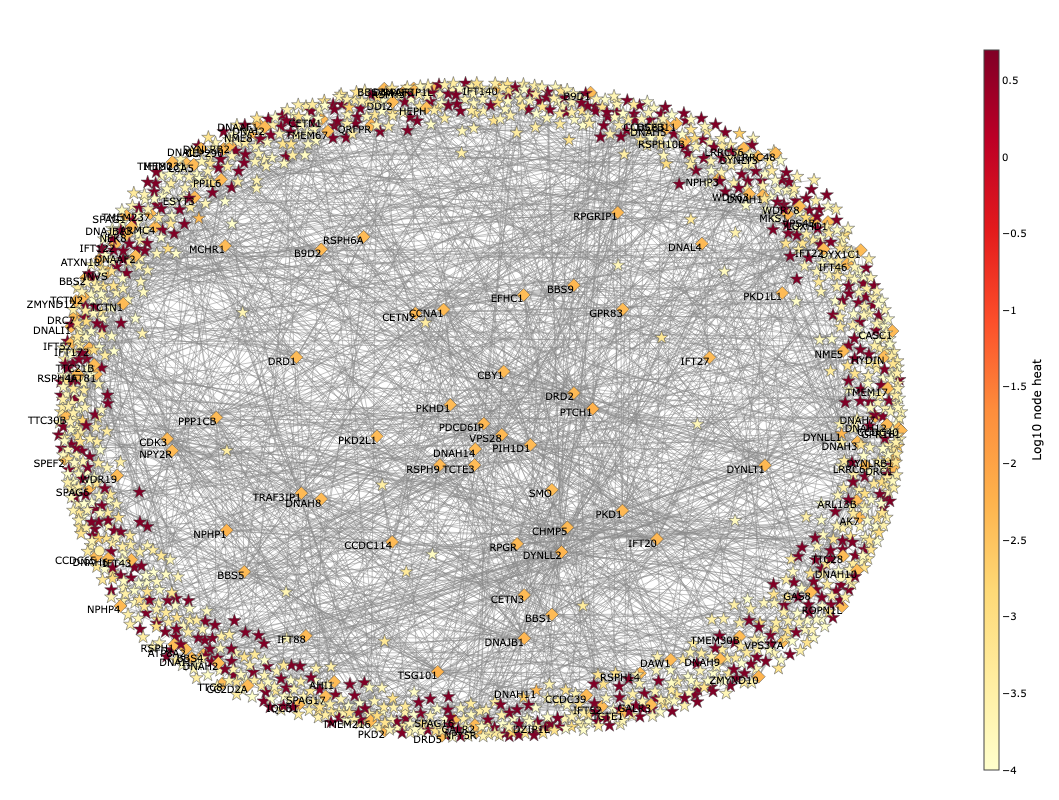

In [96]:
draw_network(nodes, edges, focus_genes=cilia_genes, star_genes=interactor_genes, labelled_genes=cilia_genes)

In [97]:
df = cila_interactome_ppi_df.loc[(cila_interactome_ppi_df['Gene 1'].isin(cilia_genes)) | \
                            (cila_interactome_ppi_df['Gene 2'].isin(cilia_genes))]#.head(300)

In [98]:
cilia_interactome_graph = nx.Graph()
cilia_interactome_graph.add_edges_from(zip(df['Gene 1'],df['Gene 2']))

In [99]:
Wprime_cilia = normalized_adj_matrix(cilia_interactome_graph)

In [100]:
seed_nodes = [x for x in cilia_genes if x in cilia_interactome_graph.nodes()]

In [101]:
nodes, edges = draw_heat_prop(cilia_interactome_graph,
                              seed_nodes=seed_nodes,
                              # random_walk = False,
                              # num_nodes=100,
                              # num_nodes=1000,
                              Wprime=Wprime_cilia,
                              largest_connected_component=False,
                              # largest_connected_component=True,
                             )

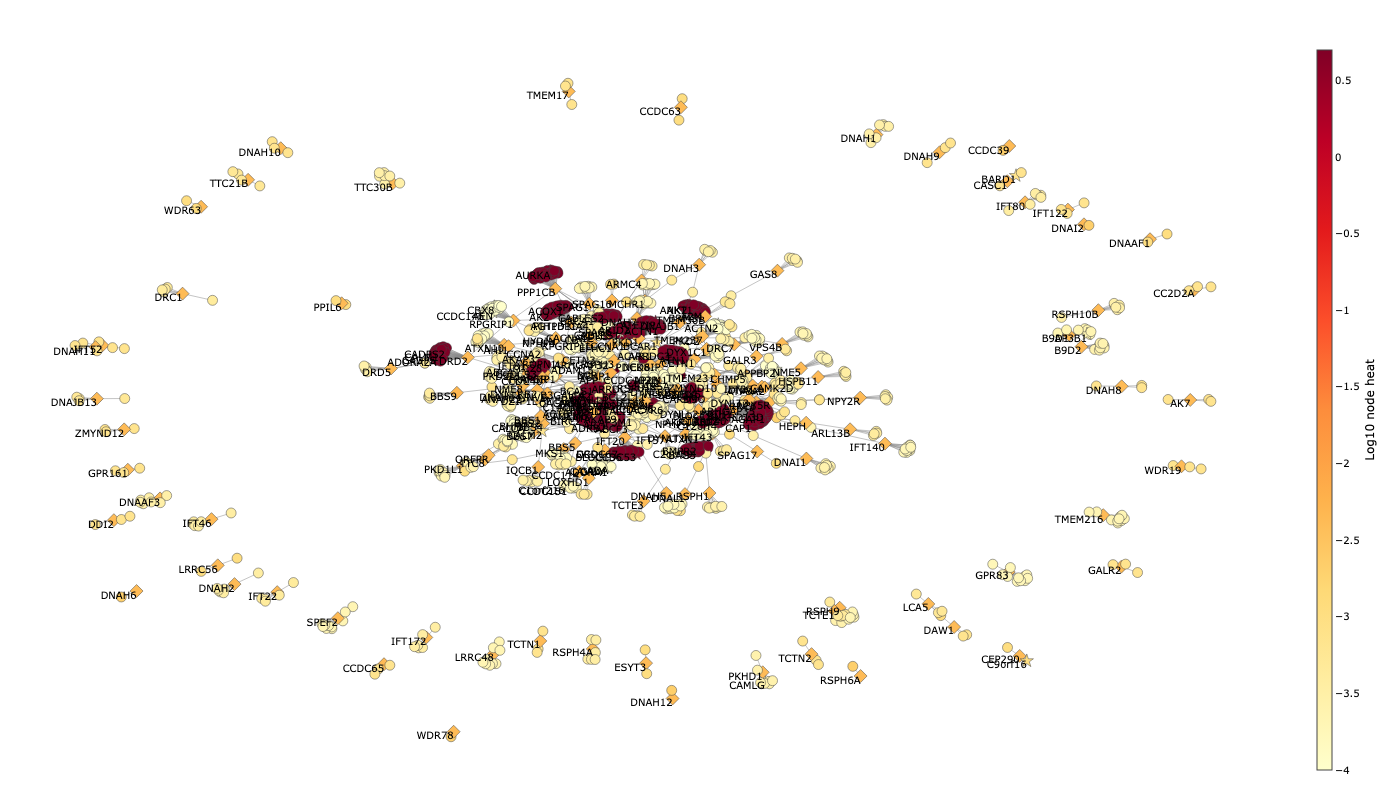

In [103]:
def draw_network(nodes, edges, focus_genes=[], star_genes=[], labelled_genes=None):
    
    # edges trace
    edge_x = []
    edge_y = []
    for edge in edges:
        x0, y0 = nodes[edge['source']]['x'], nodes[edge['source']]['y']
        x1, y1 = nodes[edge['target']]['x'], nodes[edge['target']]['y']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    # node coordinates and markers
    node_x = []
    node_y = []
    markers = []
    node_heat = []
    node_text = []    
    for node in nodes:
        x, y = node['x'], node['y']
        node_x.append(x)
        node_y.append(y)
        if node['id'] in star_genes:
            markers.append(17)
        elif node['id'] in focus_genes:
            markers.append(2)
        else:
            markers.append(0)        

        heat = np.log10(float(re.search(r'([.0-9]+)$', node['title']).group(1)))
        node_heat.append(heat)
        node_text.append(f"{node['id']}, Heat: {heat:.2}, Degree: {node['degree']}")

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        # marker_symbol=[0] * (len(node_x)-500) + [17] * 500, # HACK TO TRY DIFFERENT MARKERS...
        marker_symbol=markers,
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlOrRd',
            reversescale=False,
            # color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Log10 node heat',
                xanchor='left',
                titleside='right'
            ),
            line_width=0.5))

    # node_trace.marker.color = node_adjacencies
    node_trace.marker.color = node_heat
    node_trace.text = node_text   

    if labelled_genes is None:
        labelled_genes = [n['id'] for n in nodes]
    text_trace = go.Scatter(
        x=[n['x'] for n in nodes if n['id'] in labelled_genes],
        y=[n['y'] for n in nodes if n['id'] in labelled_genes],
        mode="text",
        name="Markers and Text",
        text=[n['id'] for n in nodes if n['id'] in labelled_genes],
        textposition="bottom left"
    )

    fig = go.Figure(data=[edge_trace, #node_trace_circles, 
                          node_trace, text_trace],
                layout=go.Layout(
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
    fig.update_layout(
        autosize=False,
        width=1400,
        height=800,
        template='plotly_white',
        font=dict(
            # family="Courier New, monospace",
            size=10,  # Set the font size here
            color="Black"
        )    
    )
    fig.update_xaxes(automargin=True)
    fig.update_yaxes(automargin=True)

    return fig

# #print(ASD_random_N[:5])
# draw_network(nodes, edges, focus_genes=ASD_genes, 
#              # star_genes=ASD_random_N[:5], 
#              labelled_genes=ASD_genes)

from ipywidgets import widgets
star_genes = interactor_genes[:100]
draw_network(nodes, edges, 
             focus_genes=cilia_genes, 
             labelled_genes=cilia_genes+star_genes, 
             star_genes=star_genes          
            )

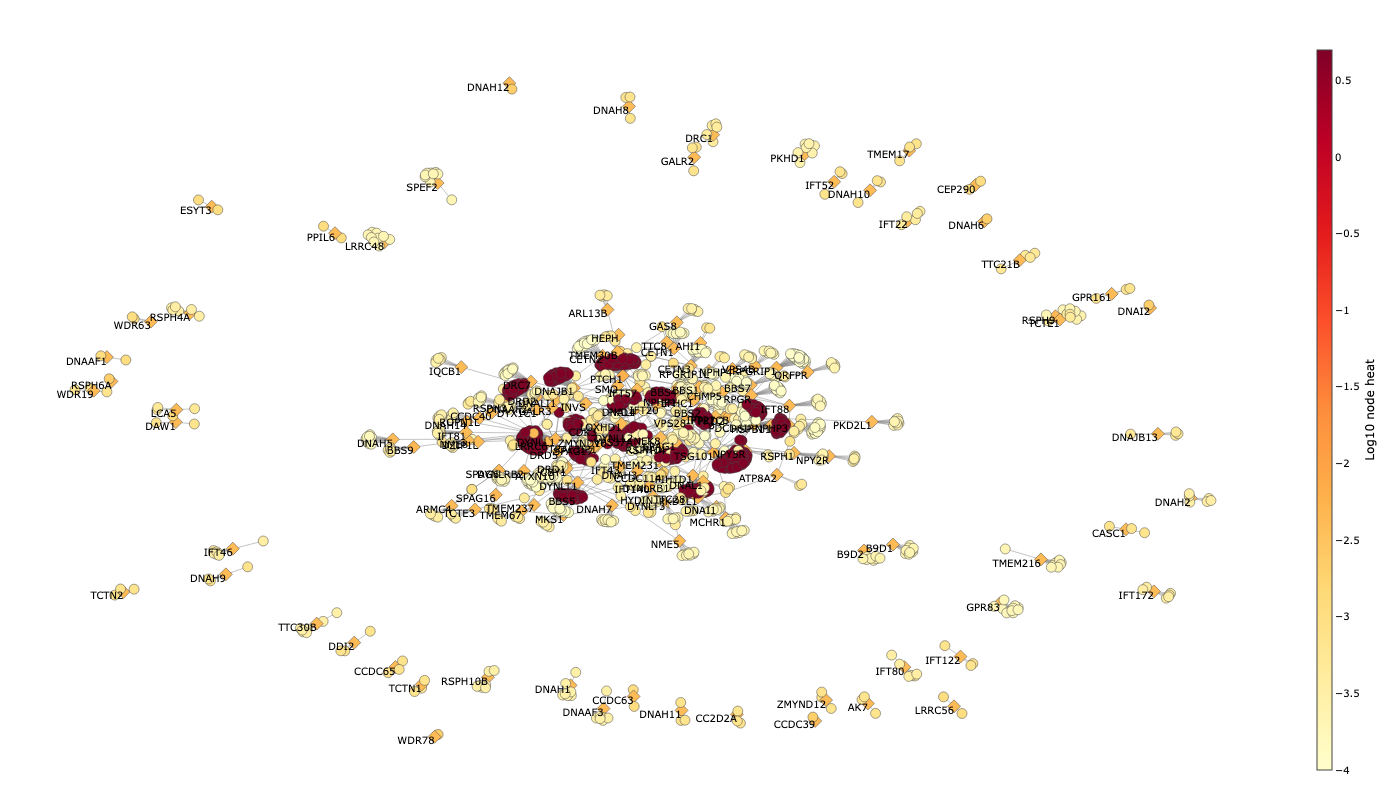

In [85]:
draw_network(nodes, edges, focus_genes=seed_nodes, labelled_genes=seed_nodes, star_genes=['DYNLT3', 'ZMYND10'])